In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts

In [32]:
drug_file = "../Mouse.csv"
clinical_trial_file ="../clinicaltrial.csv"

df = pd.read_csv (drug_file)
df.head()
df.tail()

,Mouse ID,Drug
245,i669,Placebo
246,r850,Placebo
247,a262,Placebo
248,q787,Placebo
249,j235,Placebo


In [33]:
df1 = pd.read_csv(clinical_trial_file)
df1.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [34]:
df1.shape

(1893, 4)

In [35]:
#merge two dataframe
tumor_change_df = pd.merge(df,df1)
tumor_change_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [36]:
tumor_change_groupby = tumor_change_df.groupby(["Drug","Timepoint"])
tumor_volume_mean = tumor_change_groupby["Tumor Volume (mm3)"].mean()
tumor_volume_mean.head(20)

Drug       Timepoint
Capomulin  0            45.000000
           5            44.266086
           10           43.084291
           15           42.064317
           20           40.716325
           25           39.939528
           30           38.769339
           35           37.816839
           40           36.958001
           45           36.236114
Ceftamin   0            45.000000
           5            46.503051
           10           48.285125
           15           50.094055
           20           52.157049
           25           54.287674
           30           56.769517
           35           58.827548
           40           61.467895
           45           64.132421
Name: Tumor Volume (mm3), dtype: float64

In [37]:
tumor_sem = tumor_change_df.groupby(["Drug", "Timepoint"]).sem()
drug_by_timepoint_table = pd.pivot_table(tumor_change_df, values=('Tumor Volume (mm3)'), index=('Timepoint'), columns = ('Drug'))
drug_by_timepoint_table

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


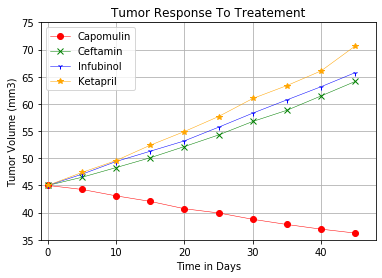

In [39]:
Capomulin, = plt.plot(drug_by_timepoint_table.index, drug_by_timepoint_table['Capomulin'],color='red', marker='o', linewidth=0.50,label="Capomulin")
Ceftamin, = plt.plot(drug_by_timepoint_table.index, drug_by_timepoint_table['Ceftamin'],color='green', marker='x', label="Ceftamin",  linewidth=0.50)
Infubinol, =plt.plot(drug_by_timepoint_table.index, drug_by_timepoint_table['Infubinol'],color='blue', marker='1', label="Infubinol",  linewidth=0.50)
Ketapril,  = plt.plot(drug_by_timepoint_table.index, drug_by_timepoint_table['Ketapril'],color='orange', marker='*', label="Ketapril",  linewidth=0.50)

plt.xlabel("Time in Days"), 
plt.ylabel("Tumor Volume (mm3)")
plt.title ("Tumor Response To Treatement")
plt.xlim(-1,48)
plt.ylim (35,75)
plt.legend(handles =[Capomulin,Ceftamin,Infubinol,Ketapril], loc ="best")
plt.grid()
plt.show()             

In [40]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
Metastatic_Sites_mean = pd.DataFrame(tumor_change_df.groupby(["Drug","Timepoint"])['Metastatic Sites'].mean())
Metastatic_Sites_mean.head(10)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
          25                 0.818182
          30                 1.090909
          35                 1.181818
          40                 1.380952
          45                 1.476190

In [41]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastatic_site_sem = pd.DataFrame(tumor_sem["Metastatic Sites"])
metastatic_site_sem.head(20)


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621
          25                 0.181818
          30                 0.172944
          35                 0.169496
          40                 0.175610
          45                 0.202591
Ceftamin  0                  0.000000
          5                  0.108588
          10                 0.152177
          15                 0.180625
          20                 0.241034
          25                 0.258831
          30                 0.249479
          35                 0.266526
          40                 0.289128
          45                 0.286101

In [42]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked
drug_by_timepoint_table.head(20)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [43]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
Metastatic_Sites_mean = pd.DataFrame(tumor_change_df.groupby(["Drug","Timepoint"])['Metastatic Sites'].mean())
Metastatic_Sites_mean.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [44]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastatic_site_sem = pd.DataFrame(tumor_sem["Metastatic Sites"])
metastatic_site_sem.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [45]:
# Minor Data Munging to Re-Format the Data Frames
drug_by_timepoint_table.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [46]:
metastatic_site_sem.head(20)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621
          25                 0.181818
          30                 0.172944
          35                 0.169496
          40                 0.175610
          45                 0.202591
Ceftamin  0                  0.000000
          5                  0.108588
          10                 0.152177
          15                 0.180625
          20                 0.241034
          25                 0.258831
          30                 0.249479
          35                 0.266526
          40                 0.289128
          45                 0.286101

In [47]:
metastatic_site_sem.loc['Capomulin']

,Metastatic Sites
Timepoint,
0,0.000000
5,0.074833
10,0.125433
15,0.132048
20,0.161621
25,0.181818
30,0.172944
35,0.169496
40,0.175610


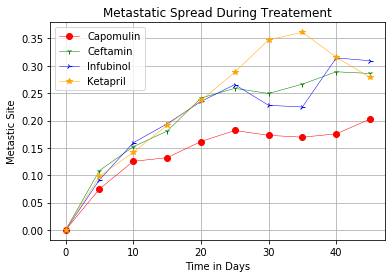

In [49]:
Capomulin, = plt.plot( metastatic_site_sem.loc['Capomulin'].index , metastatic_site_sem.loc['Capomulin'].values , color='red', marker='o', linewidth=0.50,label="Capomulin")
Ceftamin,  = plt.plot( metastatic_site_sem.loc['Ceftamin'].index  , metastatic_site_sem.loc['Ceftamin'].values  , color='green', marker='1', linewidth=0.50,label="Ceftamin")
Infubinol, = plt.plot( metastatic_site_sem.loc['Infubinol'].index , metastatic_site_sem.loc['Infubinol'].values , color='blue', marker='4', linewidth=0.50,label="Infubinol")
Ketapril, = plt.plot( metastatic_site_sem.loc['Ketapril'].index , metastatic_site_sem.loc['Ketapril'].values , color='Orange', marker='*', linewidth=0.50,label="Ketapril")

plt.xlabel("Time in Days"), 
plt.ylabel("Metastic Site")
plt.title ("Metastatic Spread During Treatement")
#plt.xlim(-1,48)
#plt.ylim (0,.4)
plt.legend(handles =[Capomulin,Ceftamin,Infubinol,Ketapril], loc ="best")
plt.grid()
plt.show()

In [50]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_mice_count_df = pd.DataFrame(tumor_change_groupby["Mouse ID"].count())
survival_mice_count_df.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [51]:
survival_count_table = pd.pivot_table(survival_mice_count_df, values=('Mouse ID'), index=('Timepoint'), columns = ('Drug'))
survival_count_table

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [52]:
survival_count_table["Capomulin_pct"] = 100 * survival_count_table["Capomulin"] /  survival_count_table["Capomulin"].iloc[0]
survival_count_table["Ceftamin_pct"] = 100 * survival_count_table["Ceftamin"] /  survival_count_table["Ceftamin"].iloc[0]
survival_count_table["Infubinol_pct"] = 100 * survival_count_table["Infubinol"] /  survival_count_table["Infubinol"].iloc[0]
survival_count_table["Ketapril_pct"] = 100 * survival_count_table["Ketapril"] /  survival_count_table["Ketapril"].iloc[0]

survival_count_table

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol,Capomulin_pct,Ceftamin_pct,Infubinol_pct,Ketapril_pct
Timepoint,,,,,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25,100.0,100.0,100.0,100.0
5,25,21,25,23,23,24,25,25,25,24,100.0,84.0,100.0,92.0
10,25,20,21,22,21,24,23,24,23,22,100.0,80.0,84.0,88.0
15,24,19,21,19,21,20,17,24,23,21,96.0,76.0,84.0,76.0
20,23,18,20,19,20,19,17,23,21,17,92.0,72.0,80.0,76.0
25,22,18,18,19,18,17,14,23,19,16,88.0,72.0,72.0,76.0
30,22,16,17,18,15,15,13,23,18,15,88.0,64.0,68.0,72.0
35,22,14,12,17,15,14,10,21,16,14,88.0,56.0,48.0,68.0
40,21,14,10,15,15,12,9,20,12,14,84.0,56.0,40.0,60.0


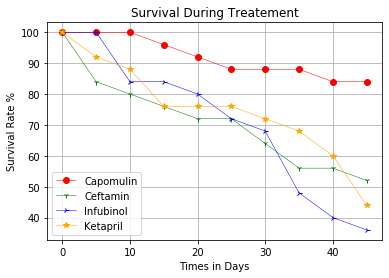

In [21]:
Capomulin, = plt.plot( survival_count_table.index ,survival_count_table["Capomulin_pct"], color='red', marker='o', linewidth=0.50,label="Capomulin")
Ceftamin,  = plt.plot( survival_count_table.index ,survival_count_table["Ceftamin_pct"]  , color='green', marker='1', linewidth=0.50,label="Ceftamin")
Infubinol, = plt.plot( survival_count_table.index ,survival_count_table["Infubinol_pct"], color='blue', marker='4', linewidth=0.50,label="Infubinol")
Ketapril, = plt.plot( survival_count_table.index ,survival_count_table["Ketapril_pct"] , color='Orange', marker='*', linewidth=0.50,label="Ketapril")

plt.xlabel("Times in Days"), 
plt.ylabel("Survival Rate %")
plt.title ("Survival During Treatement")
#plt.xlim(-1,48)
#plt.ylim (0,.4)
plt.legend(handles =[Capomulin,Ceftamin,Infubinol,Ketapril], loc ="best")
plt.grid()
plt.show()


In [22]:
first_day_data = drug_by_timepoint_table.iloc[0]
last_day_data  = drug_by_timepoint_table.iloc[-1]
percent_change = (last_day_data - first_day_data)/first_day_data*100
percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [23]:
type(percent_change)


pandas.core.series.Series

In [53]:
percent_change.index

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug')

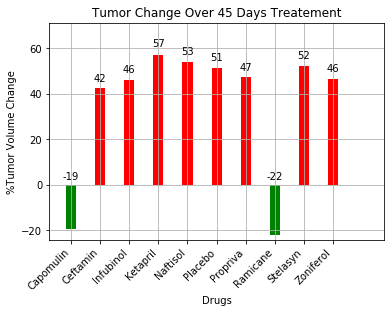

In [54]:
passed_drugs = []
failed_drugs = []
bar_colors = []

drug_names_list = percent_change.index

for percent_chg, drug_name in zip(percent_change, drug_names_list):    
    if percent_chg < 0:
        #if passed add to passed list
        passed_drugs.append( (drug_name,percent_chg) )      
        bar_colors.append("green")
    else:
        # if failed add to failed list
        failed_drugs.append ( (drug_name,percent_chg) )
        bar_colors.append("red")


x_axis = np.arange(len(drug_names_list))
width = 0.35

fig, ax = plt.subplots()
list_of_bars = ax.bar(x_axis, percent_change, width, color=bar_colors)

# define the function 
def autolabel(bars):
    """
    Attach a text label above each bar displaying its height
    """
    for this_bar in bars:
        height = this_bar.get_height()
        if height > 0:
            ax.text(this_bar.get_x() + this_bar.get_width()/2., 1.05*height, 
                '%d' % int(height), ha='center', va='bottom')
        else:
            ax.text(this_bar.get_x() + this_bar.get_width()/2., 1.5, 
                '%d' % int(height), ha='center', va='bottom')

# Call the function            
autolabel(list_of_bars)

plt.xlim(-0.75,len(list_of_bars) + 0.75)
plt.ylim(min(percent_change) - 2 ,max(percent_change) * 1.25 )

ax.set_xticks(x_axis )
ax.set_xticklabels(drug_names_list, rotation = 45, ha="right")

plt.xlabel("Drugs")
plt.ylabel("%Tumor Volume Change")
plt.title ("Tumor Change Over 45 Days Treatement")

plt.grid()
plt.savefig("tumor_change_over_45_days.png")

plt.show()
